In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.regularizers import l2
from sklearn.feature_selection import SelectKBest, chi2
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, io   # Import skimage library (data - Test images and example data.
#                          io - Reading, saving, and displaying images.)
from skimage.color import rgb2gray
import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import cv2 as cv
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [ ]:
pip install diagrams

In [ ]:
! pip install visualkeras
! pip install ann_visualizer
! pip install graphviz

In [2]:
df = pd.read_csv("/content/data_after_processing_all_100_factors.csv")

In [3]:
df.head()


,Country,People using safely managed drinking water services % of population 2017,People using safely managed sanitation services % of population 2017,Access to electricity % of population 2017,Renewable energy consumption % of total final energy consumption 2015_x,Expenditures for R&D % of GDP 2015,Urban population living in slums % of urban population 2014,Ambient PM2.5 air pollution mean annual exposure micrograms per cubic meter 2016,Adjusted net savings % of GNI 2017,Carbon dioxide emissions per capita metric tons 2014_x,...,Health expenditure per capita $ 2016,Health expenditure per capita current PPP $ 2016,External health expenditure (% of current health expenditure) 2016,"Health workers Physicians per 1,000 people 2009-18","Health workers Nurses and midwives per 1,000 people 2009-18","Specialist surgical workforce per 100,000 population 2008-18",Completeness of birth registration % 2009-18,Completeness of death registration % 2008-16,"Incidence of tuberculosis per 100,000 people 2018",output
0,Afghanistan,79.075,68.342553,97.700000,18.4,0.8568,62.70000,56.3,2.70000,0.300000,...,57.200000,162.800000,17.500000,0.30000,0.300000,0.000000,42.300000,89.309346,189.0,1
1,Albania,70.000,39.900000,100.000000,38.6,0.8568,45.73494,18.2,8.20000,2.000000,...,271.500000,759.700000,0.700000,1.20000,3.600000,11.600000,98.400000,53.000000,18.0,0
2,Algeria,79.075,17.700000,100.000000,0.1,0.5000,45.73494,39.9,21.20000,3.700000,...,260.400000,998.200000,0.000000,1.80000,2.200000,12.100000,100.000000,89.309346,69.0,0
3,American Samoa,12.600,68.342553,85.433019,0.9,0.8568,45.73494,12.4,6.70068,4.882759,...,262.872059,386.331818,9.116766,1.72328,4.139153,37.937143,84.202454,89.309346,0.0,0
4,Andorra,90.600,100.000000,100.000000,19.7,0.8568,45.73494,10.3,6.70068,5.800000,...,262.872059,386.331818,9.116766,3.30000,4.000000,83.100000,100.000000,80.000000,3.0,0


In [33]:
print('------ Dataset ------')
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

------ Dataset ------
Number of rows: 214
Number of columns: 100


In [4]:
df.set_index("Country", inplace = True)

In [5]:
# defining x and y and chose target as out put instead of Tuberculosis per 100,000
X= df.drop(columns=['Incidence of tuberculosis per 100,000 people 2018','output']).values
y= df['output'].values

In [6]:
# split the data
X1_train1, X1_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the scaler on X1_train1
X1_train1 = scaler.fit_transform(X1_train1)

In [8]:
X1_train1[0]

array([1.        , 0.87940235, 1.        , 0.32150313, 0.27906977,
       0.43527678, 0.00119332, 0.84505988, 0.17539863, 0.30653266,
       0.00948767, 0.90678825, 0.15217391, 0.14942529, 0.71428571,
       0.26449021, 0.39007092, 0.39267548, 0.0029985 , 0.005     ,
       0.10142349, 0.03716814, 0.15789474, 0.06315789, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.29622063, 0.32150313, 0.715     , 0.801     , 0.54117647,
       0.47560976, 0.12871287, 0.48604637, 0.15592126, 0.13082617,
       0.50880361, 0.18793034, 0.09249184, 0.06877729, 0.21298487,
       0.23245423, 0.01648352, 0.0747331 , 0.        , 0.0045045 ,
       0.02074689, 0.01465201, 0.06395349, 0.66666667, 0.90066225,
       0.83767535, 0.08888889, 0.23228346, 0.33703601, 0.42725161,
       0.2962963 , 0.40540541, 0.25      , 0.17539863, 0.1875    ,
       0.14285714, 0.36333333, 0.00803089, 0.00169617, 0.63265306,
       0.23958333, 0.14285714, 0.05063291, 1.        , 1.     

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
l_1 = 50
l_2 = 50
input_features = len(X1_train1[0])
nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=l_1, input_dim = input_features, activation = "tanh"))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=l_2, activation = "LeakyReLU"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4950      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Train the model
nn1.fit(X1_train1, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 2s 15ms/step - loss: 0.6388 - accuracy: 0.6187
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 0.5526 - accuracy: 0.6750
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.5089 - accuracy: 0.7125
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.7875
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.8188
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4329 - accuracy: 0.8000
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8062
Epoch 8/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4136 - accuracy: 0.8062
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.4071 - accuracy: 0.8188
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.8188
Epoch 11/50
5/5 [====================

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X1_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.6033 - accuracy: 0.7778 - 385ms/epoch - 192ms/step
Loss: 0.603334903717041, Accuracy: 0.7777777910232544


In [13]:
y_pred = nn1.predict(X1_test)

# The predictions will be in the form of probabilities, so you might want to round them to get class labels (0 or 1)
y_pred_class = y_pred.round()
# Calculate the accuracy of the predictions
correct_predictions = (y_pred_class == y_test.reshape(-1, 1)).sum()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

2/2 [==============================] - 0s 8ms/step
Accuracy: 0.7777777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.64      0.84      0.73        19

    accuracy                           0.78        54
   macro avg       0.77      0.79      0.77        54
weighted avg       0.81      0.78      0.78        54



In [14]:
from tensorflow.keras.models import save_model

model_filename = "trained_model.h5"
model_path = "D:/BC class/project 4/" + model_filename
save_model(nn1, model_path)

In [15]:
nn1.save('nn1.h5')

In [16]:
from ann_visualizer.visualize import ann_viz
ann_viz(nn1, view=True, filename='first NN visulization', title='NN — Model 1 — Simple Architecture')

In [34]:
import visualkeras

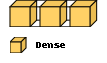

In [35]:
from PIL import ImageFont
visualkeras.layered_view(nn1, legend=True)

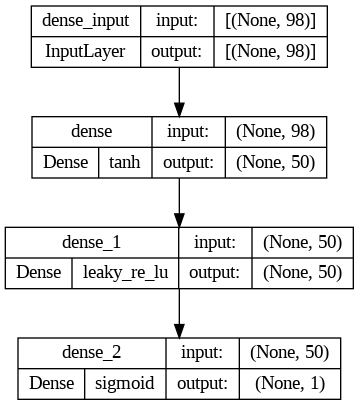

In [38]:
tf.keras.utils.plot_model(
nn1,
to_file="model1.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

# **Choosing the 20 best features and train the nn model using them**

In [17]:
k_best = 20  # Select the top 20 features
selector = SelectKBest(score_func=chi2, k=k_best)
X1_train = selector.fit_transform(X1_train1, y_train)
X1_test = selector.transform(X1_test)
#  here the out put should be discrete so the out put should be cahanged to y = output

In [18]:
selected_features_mask = selector.get_support()

# Get the column names of the selected features
selected_feature_names = df.drop(columns=['Incidence of tuberculosis per 100,000 people 2018', 'output']).columns[selected_features_mask]

# Get the p-values of each feature
p_values = selector.pvalues_[selected_features_mask]

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'P-Value': p_values
})

# Sort the DataFrame based on the p-values in ascending order
result_df = result_df.sort_values(by='P-Value')

# Reset the index of the DataFrame
result_df = result_df.reset_index(drop=True)

# Print the result DataFrame
print(result_df)

                                              Feature   P-Value
0   Access to clean fuels and technologies for coo...  0.000067
1   Access to clean fuels and technologies for coo...  0.000335
2   Renewable energy consumption % of total final ...  0.000869
3   External health expenditure (% of current heal...  0.001090
4   Agricultural employment % of total employment ...  0.001978
5   Agricultural employment % of total employment ...  0.002763
6    Access to electricity % of rural population 2016  0.003479
7   Renewable energy consumption % of total final ...  0.003566
8   Renewable energy consumption % of total final ...  0.003566
9          Access to electricity % of population 2000  0.009338
10  Internet use Individuals using the Internet % ...  0.010970
11  Health workers Physicians per 1,000 people 200...  0.016905
12  Specialist surgical workforce per 100,000 popu...  0.022272
13         Access to electricity % of population 2016  0.024547
14  Health workers Nurses and midwives p

In [19]:
X = df[[ 'Access to clean fuels and technologies for cooking % of population 2000',
       'Access to clean fuels and technologies for cooking % of population 2016',
        'Renewable energy consumption % of total final energy consumption 2015_x',
         'External health expenditure (% of current health expenditure)  2016',
         'Agricultural employment % of total employment 2000-02',
       'Agricultural employment % of total employment 2014-16',
         'Access to electricity % of rural population 2016'
         ]].values
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1,stratify=y,test_size=.2)


In [20]:
X_train[0]

array([100. , 100. ,   0.7,   0. ,   0.8,   0.5, 100. ])

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
l_1 = 50
l_2 = 50
input_features = len(X_train[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=l_1, input_dim = input_features, activation = "tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=l_2, activation = "LeakyReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                400       
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
nn.fit(X_train, y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 2s 8ms/step - loss: 0.6298 - accuracy: 0.6140
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 0.4439 - accuracy: 0.7778
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.4222 - accuracy: 0.8012
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 0.3938 - accuracy: 0.8246
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3700 - accuracy: 0.8246
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.3696 - accuracy: 0.8304
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3667 - accuracy: 0.8363
Epoch 8/50
6/6 [==============================] - 0s 14ms/step - loss: 0.3573 - accuracy: 0.8421
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.8480
Epoch 10/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3438 - accuracy: 0.8480
Epoch 11/50
6/6 [==================

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 0.4388 - accuracy: 0.8140 - 425ms/epoch - 212ms/step
Loss: 0.43884047865867615, Accuracy: 0.8139534592628479


In [25]:
y_pred = nn.predict(X_test)

# The predictions will be in the form of probabilities, so you might want to round them to get class labels (0 or 1)
y_pred_class = y_pred.round()
# Calculate the accuracy of the predictions
correct_predictions = (y_pred_class == y_test.reshape(-1, 1)).sum()
total_samples = len(y_test)
accuracy = correct_predictions / total_samples
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

2/2 [==============================] - 0s 15ms/step
Accuracy: 0.813953488372093
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.71      0.71      0.71        14

    accuracy                           0.81        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.81      0.81      0.81        43



In [26]:
import pandas as pd
from IPython.display import display

# Assuming df2 is your original DataFrame
X_df = pd.DataFrame(X, columns=['Access to clean fuels and technologies for cooking % of population 2000',
       'Access to clean fuels and technologies for cooking % of population 2016',
        'Renewable energy consumption % of total final energy consumption 2015_x',
         'External health expenditure (% of current health expenditure)  2016',
         'Agricultural employment % of total employment 2000-02',
       'Agricultural employment % of total employment 2014-16',
         'Access to electricity % of rural population 2016'])

# Get the summary statistics using describe()
summary_stats = X_df.describe()

# Display the table
display(summary_stats)

,Access to clean fuels and technologies for cooking % of population 2000,Access to clean fuels and technologies for cooking % of population 2016,Renewable energy consumption % of total final energy consumption 2015_x,External health expenditure (% of current health expenditure) 2016,Agricultural employment % of total employment 2000-02,Agricultural employment % of total employment 2014-16,Access to electricity % of rural population 2016
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,55.689894,64.848404,29.480476,9.116766,31.260963,25.916043,78.584434
std,36.504512,35.321166,28.023998,12.242946,23.547840,21.890199,33.460256
min,0.100000,0.600000,0.000000,0.000000,0.300000,0.100000,0.000000
25%,18.450000,36.600000,5.725000,0.400000,9.775000,6.825000,66.150000
50%,55.689894,70.250000,21.050000,5.550000,31.260963,25.916043,100.000000
75%,93.275000,97.175000,46.200000,9.116766,45.975000,37.800000,100.000000
max,100.000000,100.000000,95.800000,69.200000,92.200000,91.800000,100.000000


In [27]:
from tensorflow.keras.models import save_model

model_filename = "trained_model.h5"
model_path = "D:/BC class/project 4/" + model_filename
save_model(nn, model_path)

In [28]:
nn.save('nn.h5')

In [29]:
model = tf.keras.models.load_model('/content/nn.h5')

# Save model architecture to a Python (.py) file in Colab
model_architecture_code = model.to_json()
with open('/content/model_architecture.py', 'w') as f:
    f.write('model_architecture_code = \'\'\'')
    f.write(model_architecture_code)
    f.write('\'\'\'')

# Save model weights to a file
model.save_weights('/content/model_weights.h5')

In [40]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename='NN with 20 features', title='Model 2 — Simple Architecture')

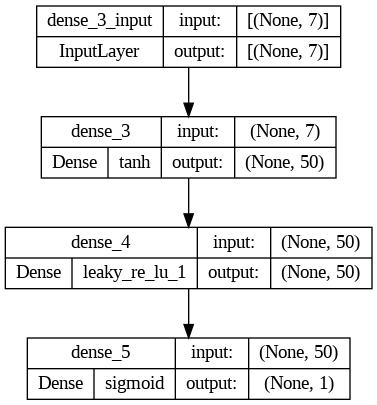

In [41]:
tf.keras.utils.plot_model(
nn,
to_file="model2.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)